# Интернет-магазин компьютерных игр

#1. [Описание проекта](#description)
#2. [Инструкция по выполнению проекта](#instruction)
#3. [Загрузка и подготовка данных к анализу](#loading)
#4. [Исследовательский анализ данных](#analysis)
#5. [Портрет пользователя](#model)
#6. [Проверка гипотез](#hypothesis)
#7. [Общий вывод](#output)

<a name="description"></a>
**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<a name="instruction"></a>
**Инструкция по выполнению проекта**

Шаг 1. Загрузить и подготовить данные к анализу;

Шаг 2. Провести исследовательский анализ данных;

Шаг 3. Составить портрет пользователя для каждого региона;

Шаг 4. Проверить гипотезы;

Шаг 5. Написать общий вывод.

<a name="loading"></a>
**Шаг 1.** Загрузка и подготовка данных к анализу.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import copy

df = pd.read_csv('')

In [2]:
#df.head()

Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [3]:
#посмотрим на сводную информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Заменим названия столбцов, приведем к нижнему регистру
df.columns = df.columns.str.lower()

Преобразуем данные в нужный тип. Опишем в каких столбцах заменили тип и почему.

* name - object - не трогаем.
* platform - object - не трогаем. 
* year_of_release - не трогаем. 
* genre - object - не трогаем.
* na_sales - float64 - не трогаем.
* eu_sales - float64 - не трогаем.
* jp_sales - float64 - не трогаем.
* other_sales -float64 - не трогаем.
* critic_score - float64 - не трогаем.
* user_score - object - переведем в тип float, так как данные в цифрах.
* rating - object - не трогаем.

In [5]:
#Проверим уникальные значения столбца user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score появляется аббревиатура 'tbd' - это сокращение произошло от выражения "to be determined", что можно перевести на русский, как  "быть определённым", т.е. оценка в процессе определения. Переведем в тип int, некорректные значения заменим на NaN методом errors.

In [6]:
#Переведем в тип float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [7]:
#Проверим кол-во пропусков
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

genre - 2 - заменим на None.
rating - 6766 - заменим на None.

In [8]:
#Заменим пропуски
df['rating'] = df['rating'].fillna('None')
df['genre'] = df['genre'].fillna('None')

In [9]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [10]:
#df.head()

Мы сделали следующее:
1. Заменили названия столбцов, а именно привели к нижнему регистру.
2. Преобразовали данные в нужный тип:
    * user_score - object - перевели в тип float.
3. Обработали пропуски:
    * genre - заменили на None.
    * critic_score - заменили на NaN.
    * user_score - заменили на NaN.
    * rating - заменили на None.
4. Обратили внимание на аббревиатуру 'tbd'. Это сокращение произошло от выражения "to be determined", что можно перевести на русский, как "быть определённым", т.е. оценка в процессе определения. Заменили на NaN.
5. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'total_sales'.


<a name="analysis"></a>
**Шаг 2.** Исследовательский анализ данных.

In [11]:
#Проверим в какие года выпускались игры
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

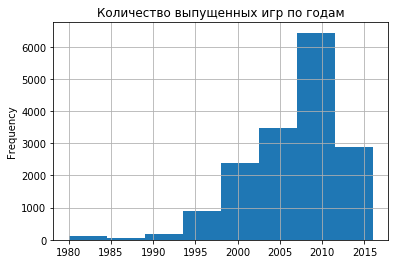

In [12]:
#Построим график и проверим в какие года было выпущено больше всего игр
df['year_of_release'].plot(kind='hist', bins = 8, grid=True, title='Количество выпущенных игр по годам');

Игры в большом объеме начали выпускать примерно с 1994 г. Пик пришелся на 2010 г., с 2011 г. выпуск игр пошел на спад. 

In [13]:
#Выберем платформы с наибольшими суммарными продажами.
sales_platform = df.groupby('platform').agg({'name':'count'}).reset_index()
sales_platform.sort_values(by='name', ascending=False).head()

,platform,name
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


Самыми популярными платформами являются PS2, DS, PS3, Wii, X360.

In [14]:
#Создадим переменную и запишем в нее топ платформ.
top_platform = ['PS2', 'DS', 'PS3', 'Wii', 'X360']

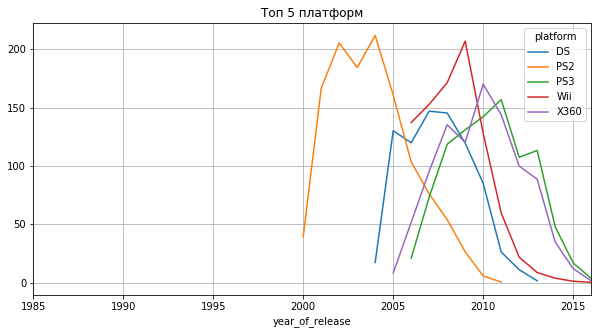

In [15]:
#Построим график для 5 топовых платформ.
df.query('platform == @top_platform')\
    .pivot_table(index ='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(10,5),title='Топ 5 платформ');

* Платформа DS существовала с 2004 по 2014 г.
* Платформа PS2 существовала с 2000 по 2011 г.
* Платформа PS3 cуществовала с 2006 по 2016 г.
* Платформа Wii существовала с 2006 по 2016 г.
* Платформа X360 существовала с 2005 по 2015 г.

Можем сделать вывод, что в среднем платформа существует 10 лет и заменяется на новую.



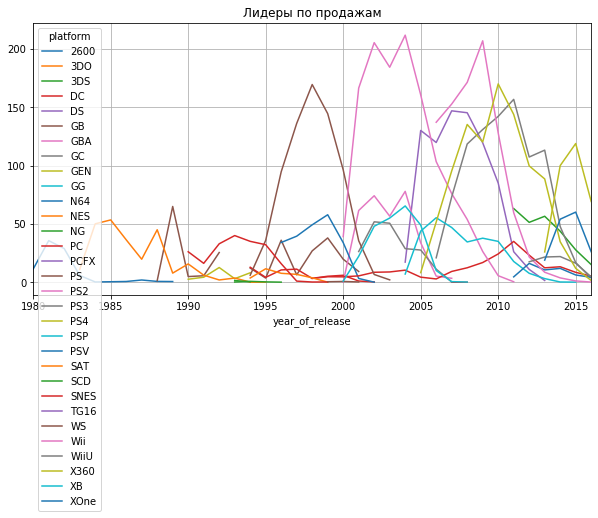

In [16]:
#Построим график по всем платформам, узнаем какие лидируют по продажам, растут или падают.
df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(10,5), title='Лидеры по продажам');

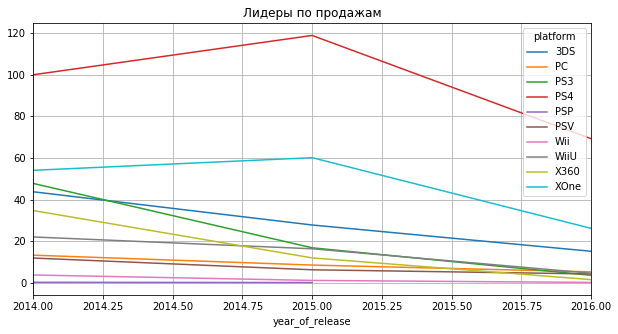

In [17]:
(df
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(style='-', grid=True, figsize=(10,5), title='Лидеры по продажам')
);

In [18]:
#На графике не совсем ясно какие платформы самые прибыльные, сгрупируем данные.
leader_platforms = df.groupby('platform')['total_sales'].agg(['sum'])
leader_platforms.sort_values(by='sum', ascending=False).head()

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Лидерами по продажам являются:
* PS2
* X360
* PS3

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 3.0)

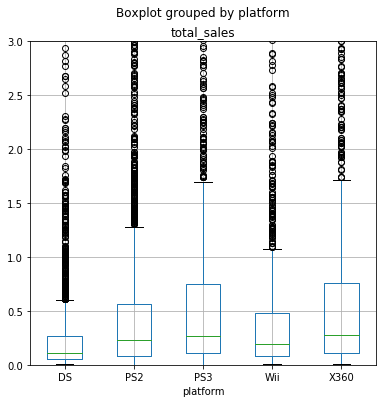

In [19]:
#Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.
df.query('platform == @top_platform')\
    .boxplot('total_sales', by='platform', figsize=(6, 6)).set_ylim(0, 3.0)

Проверим влияние отзывов пользователей и критиков на одну из самых популярных платформ. 
PS3 существует на рынке с 2006 года и среди пяти популярных платформ в 2015 году была самой продаваемой. 


In [20]:
#Посмотрим уникальные значения в столбце
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [21]:
#Посмотрим уникальные значения в столбце
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [22]:
top_game = ['PS2']

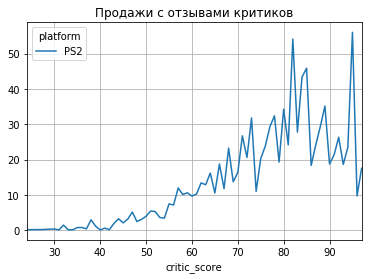

In [23]:
df.query('platform == @top_game')\
    .pivot_table(index ='critic_score', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(6,4),title='Продажи с отзывами критиков');

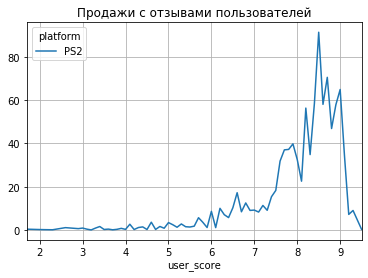

In [24]:
df.query('platform == @top_game')\
    .pivot_table(index ='user_score', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(6,4),title='Продажи с отзывами пользователей');

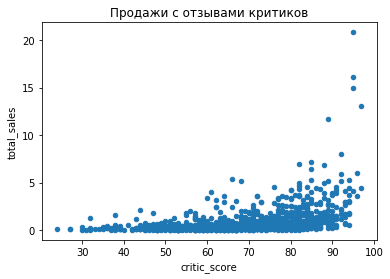

In [25]:
#Построим диаграмму рассеяния
df_ps2 = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)].copy()
df_ps2.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(6,4),title='Продажи с отзывами критиков');

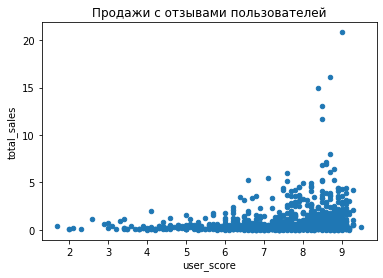

In [26]:
#Построим диаграмму рассеяния
df_ps2 = df[(df['platform'] == 'PS2') & (df['user_score'] > 0)].copy()
df_ps2.plot(kind='scatter', x='user_score', y='total_sales', figsize=(6,4),title='Продажи с отзывами пользователей');

In [27]:
df['total_sales'].corr(df['critic_score'])

0.24550668717736324

In [28]:
df['total_sales'].corr(df['user_score'])

0.08817911987579136

In [29]:
#df.head()

In [30]:
#Посмотрим какие жанры продаются лучше
popular_genre = df.groupby('genre').agg({'total_sales':'count'}).reset_index()
popular_genre.sort_values(by='total_sales', ascending=False).head()

,genre,total_sales
0,Action,3369
11,Sports,2348
3,Misc,1750
8,Role-Playing,1498
9,Shooter,1323


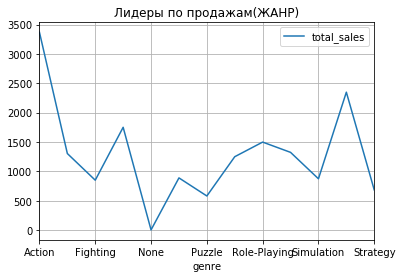

In [31]:
df.pivot_table(index ='genre', values='total_sales', aggfunc='count')\
    .plot(style='-', grid=True, figsize=(6,4), title='Лидеры по продажам(ЖАНР)');

Жанр action является лидером по продажам. А вот жанр shooter продается хуже всего.

Мы сделали следующее:

Узнали, что игры в большом объеме начали выпускать примерно с 1994 г. Пик пришелся на 2010 г., с 2011 г. выпуск игр пошел на спад. 

Выяснили, что самыми популярными платформами являются PS2, DS, PS3, Wii, X360.
* Платформа DS существовала с 2004 по 2014 г.
* Платформа PS2 существовала с 2000 по 2011 г.
* Платформа PS3 cуществовала с 2006 по 2016 г.
* Платформа Wii существовала с 2006 по 2016 г.
* Платформа X360 существовала с 2005 по 2015 г.

Сделали вывод, что в среднем платформа существует 10 лет и заменяется на новую.

Актуальный период определили как 2005-2015 г.г., в эти года пять лидеров находлись на пике.

Установили лидеров по продаже:
* PS2
* X360
* PS3

Выяснили, что отзывы критиков влияют на продажи, и что жанр action лидер среди игровых жанров. 

<a name="model"></a>
**Шаг 3.** Портрет пользователя для каждого региона.

In [32]:
#Посчитаем самые популярные платформы для каждого региона
leader_platforms_na = df.groupby('platform')['na_sales'].agg(['sum'])
leader_platforms_na.sort_values(by='sum', ascending=False).head()

,sum
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


In [33]:
leader_platforms_eu = df.groupby('platform')['eu_sales'].agg(['sum'])
leader_platforms_eu.sort_values(by='sum', ascending=False).head()

,sum
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


In [34]:
leader_platforms_jp = df.groupby('platform')['jp_sales'].agg(['sum'])
leader_platforms_jp.sort_values(by='sum', ascending=False).head()

,sum
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


Лидеры по продажам в:
* Северной Америке - X360 - 602,47 млн.
* Европе - PS2 - 339,29 млн.
* Японии - DS - 175,57 млн.

В Северной Америке игроков в три раза больше, чем в Японии.

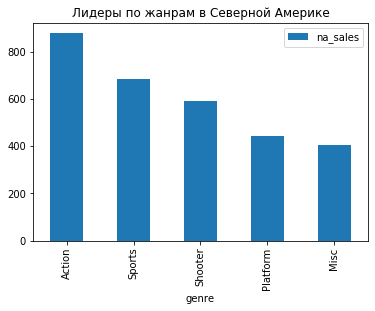

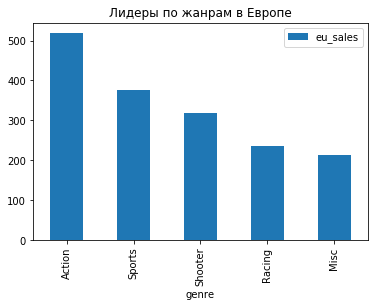

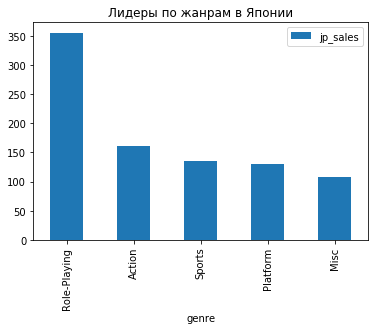

In [35]:
# Посмотрим на самые популярные жанры для каждого региона
df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='Лидеры по жанрам в Северной Америке')
df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Лидеры по жанрам в Европе')
df.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='Лидеры по жанрам в Японии');

Лидеры по жанрам в:
* Северной Америке - Action.
* Европе - PS2 - Action.
* Японии - DS - Role-Playing

In [36]:
#Посмотрим на аббревиатуры рейтингов
df['rating'].unique()

array(['E', 'None', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [37]:
rating_sales_na = df.groupby('rating')['na_sales'].agg(['sum'])
rating_sales_na.sort_values(by='sum', ascending=False)

,sum
rating,
E,1292.99
None,1242.46
T,759.75
M,748.48
E10+,353.32
K-A,2.56
EC,1.53
AO,1.26
RP,0.00


In [38]:
rating_sales_eu = df.groupby('rating')['eu_sales'].agg(['sum'])
rating_sales_eu.sort_values(by='sum', ascending=False)

,sum
rating,
E,710.25
None,613.83
M,483.97
T,427.03
E10+,188.52
AO,0.61
K-A,0.27
EC,0.11
RP,0.08


In [39]:
rating_sales_jp = df.groupby('rating')['jp_sales'].agg(['sum'])
rating_sales_jp.sort_values(by='sum', ascending=False)

,sum
rating,
None,841.96
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46
AO,0.00
EC,0.00
RP,0.00


Таким образом рейтинг E - («Everyone») — «Для всех» находится в лидерах во всех регионах.
На последнем месте игры с рейтингом RP - «RP» ( «Rating Pending»») — «Рейтинг ожидается».

Лидеры по продажам в:
* Северной Америке - X360 - 602,47 млн.
* Европе - PS2 - 339,29 млн.
* Японии - DS - 175,57 млн.
В Северной Америке игроков в три раза больше, чем в Японии.

Лидеры по жанрам в:
* Северной Америке - Action.
* Европе - PS2 - Action.
* Японии - DS - Role-Playing

Рейтинг E - («Everyone») — «Для всех» находится в лидерах в Америке и Европе. В Японии же в лидерах игра без рейтинга. 
На последнем месте игры с рейтингом RP - «RP» ( «Rating Pending»») — «Рейтинг ожидается».</div>

<a name="hypothesis"></a>
**Шаг 4.** Проверка гипотез.

Гипотеза №1

Нулевая гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC различаются. Альтернативная гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC не различаются.

In [40]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [41]:
alpha = 0.05

XOne = df.query('platform == "XOne"')
PS = df.query('platform == "PS"')

results = st.ttest_ind(
    XOne['user_score'],
    PS['user_score'],
    nan_policy='omit',
    equal_var = True
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.810725619840532e-18
Отвергаем нулевую гипотезу


Вывод:

Средние пользовательские рейтинги платформ Xbox One и PC не различаются.

Гипотеза № 2

Нулевая гипотеза H0 - средние пользовательские рейтинги жанров Action и Sports различаются. Альтернативная гипотеза H1 - средние пользовательские рейтинги жанров Action и Sports  не различаются.

In [42]:
alpha = 0.05

action = df.query("genre == 'Action'")
sports = df.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit',
    equal_var = True
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359035752
Не получилось отвергнуть нулевую гипотезу


Вывод:

Средние пользовательские рейтинги жанров Action и Sports различаются.

In [43]:
x = df.query("genre == 'Action'")
variance = np.var(x, ddof=1)
variance

year_of_release     37.380383
na_sales             0.317348
eu_sales             0.162627
jp_sales             0.026902
other_sales          0.055716
critic_score       201.835362
user_score           2.031747
total_sales          1.312392
dtype: float64

In [44]:
x = df.query("genre == 'Sports'")
variance = np.var(x, ddof=1)
variance

year_of_release     32.021032
na_sales             1.076293
eu_sales             0.607187
jp_sales             0.049982
other_sales          0.058405
critic_score       192.610889
user_score           2.596515
total_sales          4.346300
dtype: float64

In [45]:
x = df.query('platform == "XOne"')
variance = np.var(x, ddof=1)
variance

year_of_release      0.908199
na_sales             0.397680
eu_sales             0.133448
jp_sales             0.000027
other_sales          0.008878
critic_score       167.792265
user_score           1.906997
total_sales          1.073584
dtype: float64

In [46]:
x = df.query('platform == "PS"')
variance = np.var(x, ddof=1)
variance

year_of_release      3.415441
na_sales             0.286045
eu_sales             0.137209
jp_sales             0.103865
other_sales          0.003541
critic_score       279.225905
user_score           1.774077
total_sales          1.111973
dtype: float64

<a name="output"></a>
**Шаг 5.** Общий вывод.

Проведя данный анализ мы выяснили:

1. Игры в большом объеме начали выпускать примерно с 1994 г. Пик пришелся на 2010 г., с 2011 г. выпуск игр пошел на спад. 

2. Самыми популярными платформами являются PS2, DS, PS3, Wii, X360.
    * Платформа DS существовала с 2004 по 2014 г.
    * Платформа PS2 существовала с 2000 по 2011 г.
    * Платформа PS3 cуществовала с 2006 по 2016 г.
    * Платформа Wii существовала с 2006 по 2016 г.
    * Платформа X360 существовала с 2005 по 2015 г.

3. Сделали вывод, что в среднем платформа существует 10 лет и заменяется на новую.

4. Установили лидеров по продаже:
    * PS2
    * X360
    * PS3

5. Выяснили, что отзывы критиков влияют на продажи, и что жанр action лидер среди игровых жанров. 


6. Лидеры по продажам в:
    * Северной Америке - X360 - 602,47 млн.
    * Европе - PS2 - 339,29 млн.
    * Японии - DS - 175,57 млн.

В Северной Америке игроков в три раза больше, чем в Японии.

7. Лидеры по жанрам в:
    * Северной Америке - Action.
    * Европе - PS2 - Action.
    * Японии - DS - Role-Playing


8. Рейтинг E - («Everyone») — «Для всех» находится в лидерах во всех регионах.
9. На последнем месте игры с рейтингом RP - «RP» ( «Rating Pending»») — «Рейтинг ожидается».
10. Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
11. Средние пользовательские рейтинги жанров Action и Sports различаются.
